<a href="https://colab.research.google.com/github/Snehitha13/CAPSTONE/blob/main/ARIMA_MSFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060657,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062823,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063907,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062281,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061198,47894400
...,...,...,...,...,...,...,...
9359,2023-05-02,307.760010,309.179993,303.910004,305.410004,305.410004,26404400
9360,2023-05-03,306.619995,308.609985,304.089996,304.399994,304.399994,22360800
9361,2023-05-04,306.239990,307.760010,303.399994,305.410004,305.410004,22519900
9362,2023-05-05,305.720001,311.970001,304.269989,310.649994,310.649994,28181200


In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9359,2023-05-02,305.410004
9360,2023-05-03,304.399994
9361,2023-05-04,305.410004
9362,2023-05-05,310.649994


In [ ]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9359    2023-05-02
9360    2023-05-03
9361    2023-05-04
9362    2023-05-05
9363    2023-05-08
Name: Date, Length: 9364, dtype: object

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2000-03-19')
datetime_object

datetime.datetime(2000, 3, 19, 0, 0)

In [ ]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9359,2023-05-02,305.410004
9360,2023-05-03,304.399994
9361,2023-05-04,305.410004
9362,2023-05-05,310.649994


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-6-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9359   2023-05-02
9360   2023-05-03
9361   2023-05-04
9362   2023-05-05
9363   2023-05-08
Name: Date, Length: 9364, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-05-02,305.410004
2023-05-03,304.399994
2023-05-04,305.410004


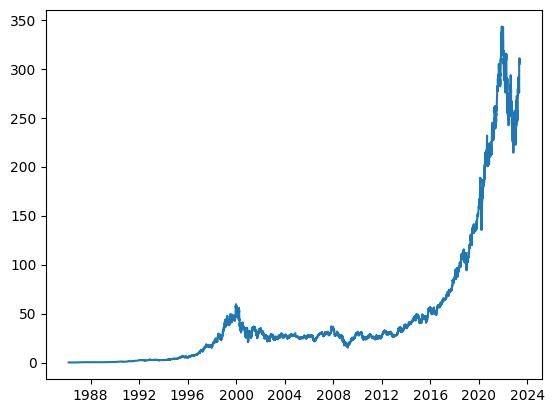

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

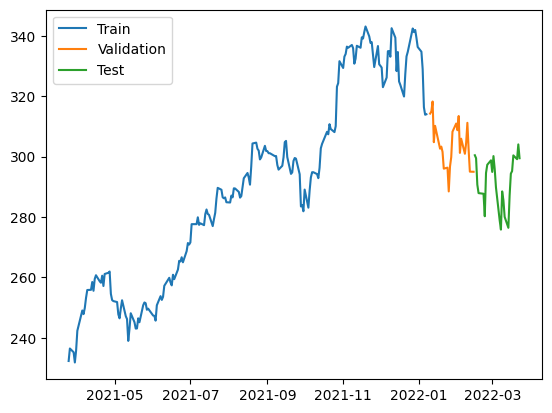

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
import statsmodels.api as sm

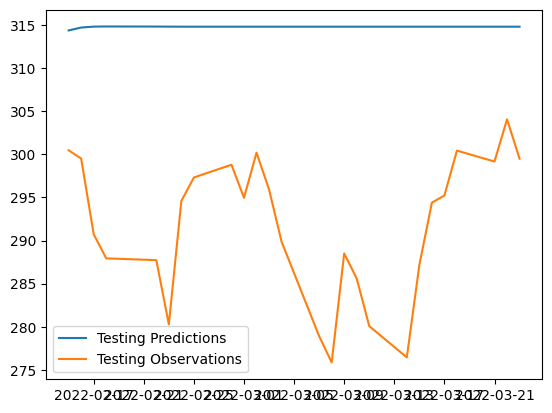

Testing MAE: 23.112522602899592


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Assuming you have loaded your data into y_train, X_test, y_test, and dates_test

# Check stationarity and apply differencing if necessary
# You can use the Dickey-Fuller test to check for stationarity

# Create and fit the ARIMA model
order = (5, 1, 0)  # You may need to adjust the order parameter
model = ARIMA(y_train, order=order)
model_fit = model.fit()

# Make predictions on the test data
test_predictions = model_fit.forecast(steps=len(X_test))

# Plot the test predictions and observations
plt.plot(dates_test, test_predictions, label='Testing Predictions')
plt.plot(dates_test, y_test, label='Testing Observations')
plt.legend()
plt.show()

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, test_predictions)
print("Testing MAE:", mae)


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Define your training and validation data here (X_train, y_train, X_val, y_val)

# Assuming your data is in a pandas DataFrame or Series, you can use the following:

# Create and fit the ARIMA model
model = ARIMA(y_train, order=(5, 1, 0))  # You may need to adjust the order parameter
model_fit = model.fit()

# Make predictions on the validation data
y_pred = model_fit.forecast(steps=len(X_val))

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, y_pred)
print("MAE:", mae)

threshold = 200
if mae <= threshold:
    accuracy = (threshold - mae) / threshold * 100
    print(f"Accuracy: {accuracy:.2f}%")
else:
    print("Accuracy: 0.00% (MAE exceeds the threshold)")


MAE: 10.87002632435314
Accuracy: 94.56%


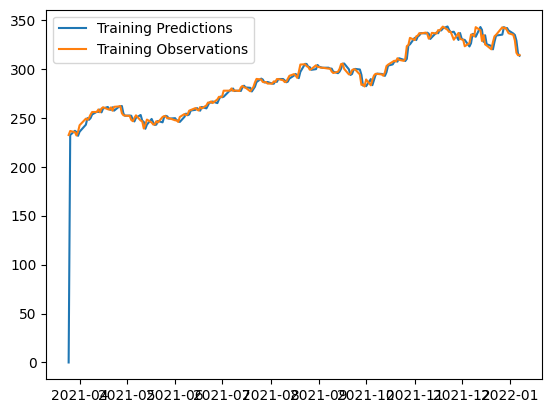

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Define your training data here (X_train, y_train)
# Assuming your data is in a pandas Series or DataFrame

# Create and fit the ARIMA model
model = ARIMA(y_train, order=(5, 1, 0))  # You may need to adjust the order parameter
model_fit = model.fit()

# Make predictions on the training data
train_predictions = model_fit.fittedvalues

# Plot the training predictions and observations
plt.plot(dates_train, train_predictions, label='Training Predictions')
plt.plot(dates_train, y_train, label='Training Observations')
plt.legend()
plt.show()

# Calculate the Mean Absolute Error (MAE)
#mae = mean_absolute_error(y_train[1:], train_predictions)
#print("Training MAE:", mae)


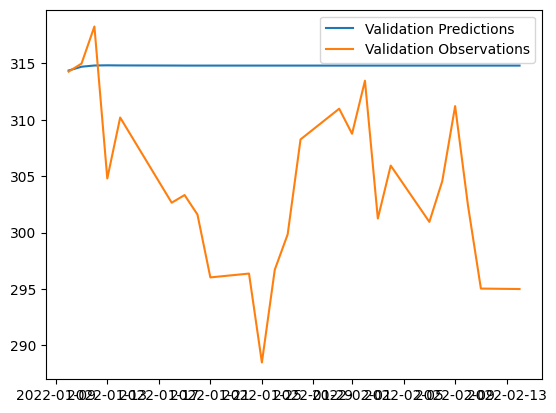

Validation MAE: 10.87002632435314


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Define your validation data here (X_val, y_val)
# Assuming your data is in a pandas Series or DataFrame

# Create and fit the ARIMA model
model = ARIMA(y_train, order=(5, 1, 0))  # You may need to adjust the order parameter
model_fit = model.fit()

# Make predictions on the validation data
val_predictions = model_fit.forecast(steps=len(X_val))

# Plot the validation predictions and observations
plt.plot(dates_val, val_predictions, label='Validation Predictions')
plt.plot(dates_val, y_val, label='Validation Observations')
plt.legend()
plt.show()

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, val_predictions)
print("Validation MAE:", mae)


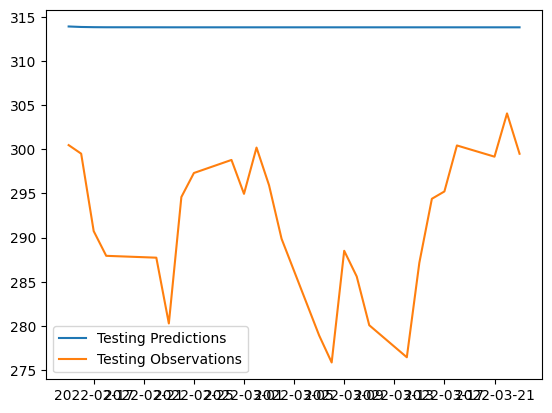

Testing MAE: 22.14367894406162


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Define your test data here (X_test, y_test)
# Assuming your data is in a pandas Series or DataFrame

# Create and fit the ARIMA model
model = ARIMA(y_train, order=(1, 1, 1))  # You may need to adjust the order parameter
model_fit = model.fit()

# Make predictions on the test data
test_predictions = model_fit.forecast(steps=len(X_test))

# Plot the test predictions and observations
plt.plot(dates_test, test_predictions, label='Testing Predictions')
plt.plot(dates_test, y_test, label='Testing Observations')
plt.legend()
plt.show()

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, test_predictions)
print("Testing MAE:", mae)



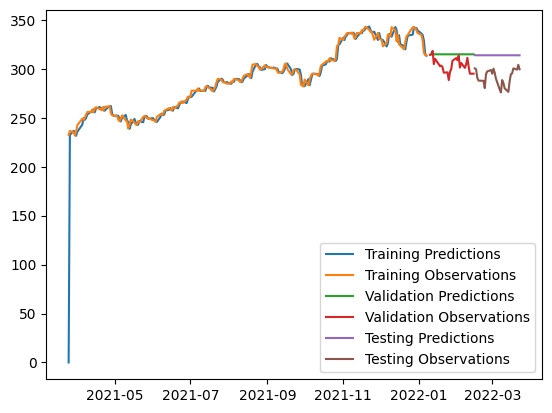

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

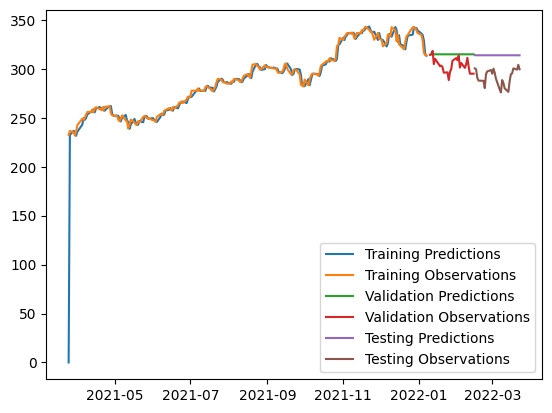

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
#plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])